# 🌪️ Which news outlets are giving climate change the most coverage?

This data set contains over 142,000 articles from 15 sources mostly from 2016 and 2017.

One of the things that might be interesting to look at is the correlation, if any, between the characteristics of these news outlets and the proportion of climate-change-related articles they publish.  We might hypothesize that right-leaning **Breitbart**, for example, would have a lower proportion of climate related articles than, say, **NPR**. [Source](https://www.dataquest.io/blog/tutorial-text-analysis-python-test-hypothesis/)

In [ ]:
# Data source https://www.kaggle.com/snapcrack/all-the-news

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from collections import Counter
from nltk.corpus import stopwords

pt1 = pd.read_csv('../kaggle/articles1.csv', index_col=0)
pt2 = pd.read_csv('../kaggle/articles2.csv', index_col=0)
pt3 = pd.read_csv('../kaggle/articles3.csv', index_col=0)

articles = pd.concat([pt1,pt2,pt3])
print(f"Dataset contains {len(articles)} articles written between {int(articles['year'].min())} and {int(articles['year'].max())}")
print(f"\nList of publications includes: {articles.publication.unique().tolist()}")

Dataset contains 142570 articles written between 2000 and 2017

List of publications includes: ['New York Times', 'Breitbart', 'CNN', 'Business Insider', 'Atlantic', 'Fox News', 'Talking Points Memo', 'Buzzfeed News', 'National Review', 'New York Post', 'Guardian', 'NPR', 'Reuters', 'Vox', 'Washington Post']


In [3]:
articles.sample(3)

,id,title,publication,author,date,year,month,url,content
53031,73098,The sugar industry is quietly funding one of t...,Business Insider,Erin Brodwin,2016-12-21,2016.0,12.0,NaN,’ ’ ” Another study published this week wit...
139723,210074,Cruz fires spokesman over tweet about story fa...,Washington Post,David Weigel,2016-02-22,2016.0,2.0,https://web.archive.org/web/20160223001336/htt...,LAS VEGAS Sen. Ted Cruz ( .) has parte...
12315,31051,7 Virtue-Signaling Celebrities Silent on Massa...,Breitbart,Allum Bokhari,2017-05-26,2017.0,5.0,NaN,insist that they are the champions of minori...


# 📰 Articles by Publications 

Breitbart leads the pack

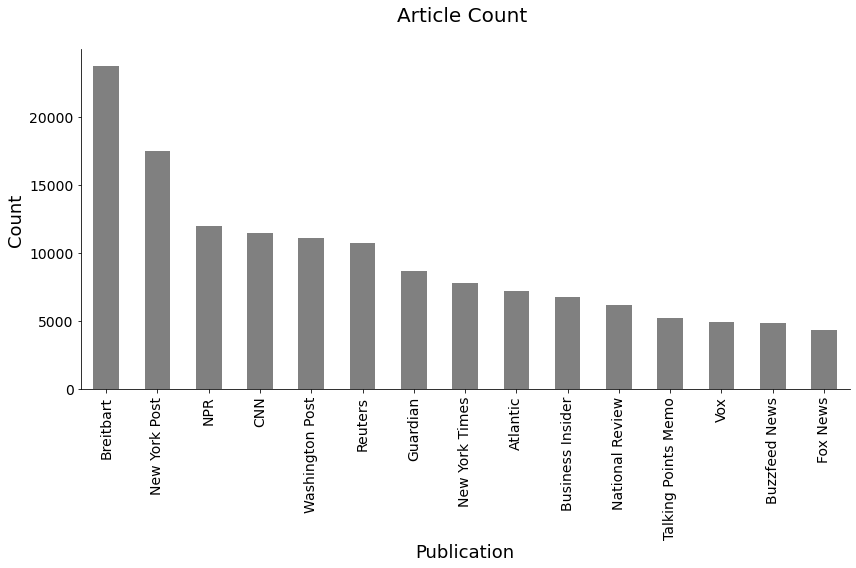

In [4]:
# ax = articles['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
# ax.set_title('Article Count\n', fontsize=20)
# ax.set_xlabel('Publication', fontsize=18)
# ax.set_ylabel('Count', fontsize=18)
# plt.tight_layout()
# sns.despine();

ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,8), color="gray")
ax.set_title('Article Count \n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
plt.tight_layout()
sns.despine();

# 🗞️ Length of articles

In [4]:
def clean_text(article):
    # removes punctuation and converts all the text to lower case
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))

print(f"Average number of words in an article: {int(articles['num_wds'].mean())}")
print(f"Longest article: {int(articles['num_wds'].max())}, Shortest: {int(articles['num_wds'].min())}")

print(f"\nRemoving {len(articles[articles['num_wds']==0])} articles with {int(articles['num_wds'].min())} words.")
articles = articles[articles['num_wds']>0]

Average number of words in an article: 732
Longest article: 49902, Shortest: 0

Removing 97 articles with 0 words.


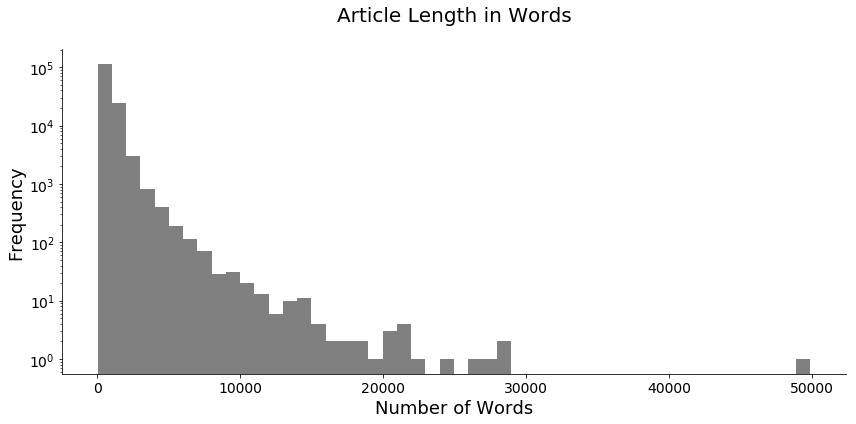

In [5]:
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="gray")
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18)
ax.set_yscale("log")
plt.tight_layout()
sns.despine();

# 💬 Unique words

In [6]:
# number of unique words in each article
articles['uniq_wds'] = articles['tokenized'].str.split().apply(lambda x: len(set(x)))

print(f"Average number of unique words in an article: {int(articles['uniq_wds'].mean())}")
print(f"Maximum unique word: {int(articles['uniq_wds'].max())}, Minimum: {int(articles['uniq_wds'].min())}")

Average number of unique words in an article: 336
Maximum unique word: 4692, Minimum: 1


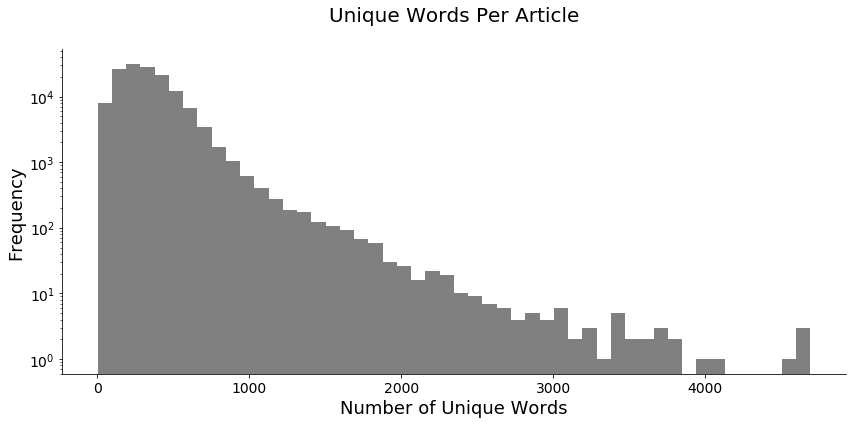

In [7]:
ax=articles['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="gray")
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18)
ax.set_yscale("log")
plt.tight_layout()
sns.despine();

# 🥊 Vox vs. Business Insider. You decide

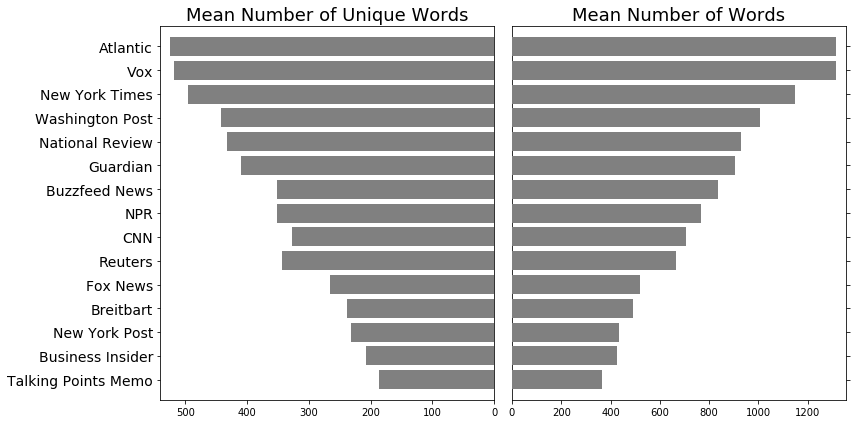

In [8]:
# Data
art_grps = articles.groupby('publication')

publications = art_grps['num_wds'].aggregate(np.mean).index.tolist()
avg_words = art_grps['num_wds'].aggregate(np.mean).values
unique_words = art_grps['uniq_wds'].aggregate(np.mean).values

# Sort by number of avg_words
idx = avg_words.argsort()
publications, avg_words, unique_words = [np.take(x, idx) for x in [publications, avg_words, unique_words]]

y = np.arange(unique_words.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
axes[0].barh(y, unique_words, align='center', color='gray', zorder=10)
axes[0].set_title('Mean Number of Unique Words', fontsize=18)
axes[1].barh(y, avg_words, align='center', color='gray', zorder=10)
axes[1].set_title('Mean Number of Words', fontsize=18)

axes[0].invert_xaxis()
axes[0].set_yticks(y)
axes[0].set_yticklabels(publications, fontsize=14)
axes[0].yaxis.tick_left()

axes[1].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(False)

fig.tight_layout()
fig.subplots_adjust(wspace=0)
plt.tight_layout();

# 👄 Most common words

In [9]:
wd_counts = Counter()
for i, row in articles.iterrows():
    wd_counts.update(row['tokenized'].split())
    
for sw in stopwords.words('english'):
    del wd_counts[sw]
    
wd_counts.most_common(20)

[('said', 571476),
 ('trump', 359436),
 ('would', 263184),
 ('one', 260552),
 ('people', 246748),
 ('new', 205187),
 ('also', 181491),
 ('like', 178532),
 ('president', 161541),
 ('time', 144047),
 ('could', 143626),
 ('first', 132971),
 ('years', 131219),
 ('two', 126745),
 ('even', 124510),
 ('says', 123381),
 ('state', 118926),
 ('many', 116965),
 ('u', 116602),
 ('last', 115748)]

# 🌂 How many articles are talking about climate change? 

Let's identify keywords that might correlate with the topic, and search for them in the articles. 

We want the string **`chang`** followed by the string **`climate`** within 1 to 5 words (in regular expressions, `\w+` matches one or more word characters, and `\W+` matches one or more nonword characters).

In [10]:
def find_cc_wds(content, cc_wds=['climate change','global warming', 'extreme weather', 'greenhouse gas'
                                 'clean energy', 'clean tech', 'renewable energy']
):
    found = False
    for w in cc_wds:
        if w in content:
            found = True
            break

    if not found:
        disj = re.compile(r'(chang\w+\W+(?:\w+\W+){1,5}?climate) | (climate\W+(?:\w+\W+){1,5}?chang)')
        if disj.match(content):
            found = True
    return found

articles['cc_wds'] = articles['tokenized'].apply(find_cc_wds)

print(f"The proportion of climate coverage over all articles is {np.round(100*articles['cc_wds'].sum() / len(articles), 1)}%")

The proportion of climate coverage over all articles is 3.1%


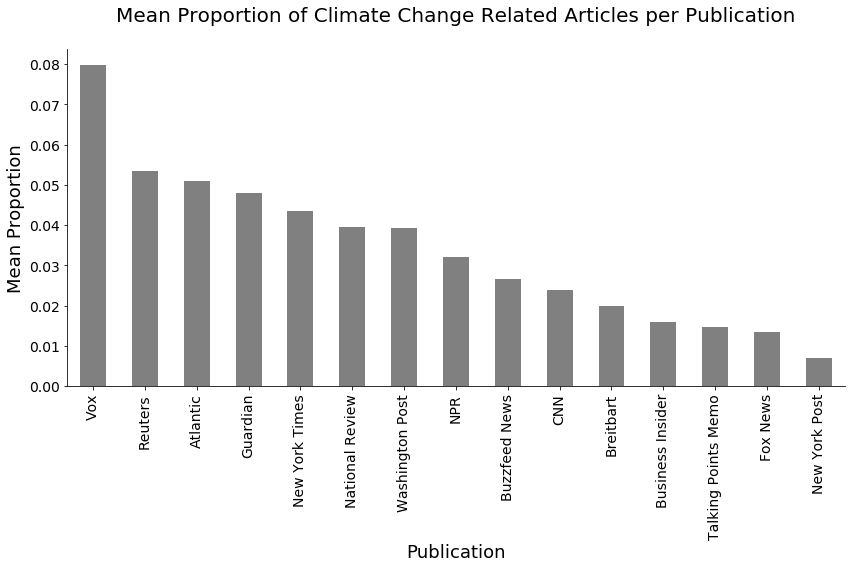

In [11]:
proportions = art_grps['cc_wds'].sum() / art_grps['cc_wds'].count()
proportions.sort_values(ascending=True)

ax=proportions.sort_values(ascending=False).plot(kind='bar', fontsize=14, figsize=(12,8), color="gray")
ax.set_title('Mean Proportion of Climate Change Related Articles per Publication\n', fontsize=20)
ax.set_ylabel('Mean Proportion', fontsize=18)
ax.set_xlabel('Publication', fontsize=18)
plt.tight_layout()
sns.despine();

# 🧑🏿‍🤝‍🧑🏿 Is a certain political group more prominent

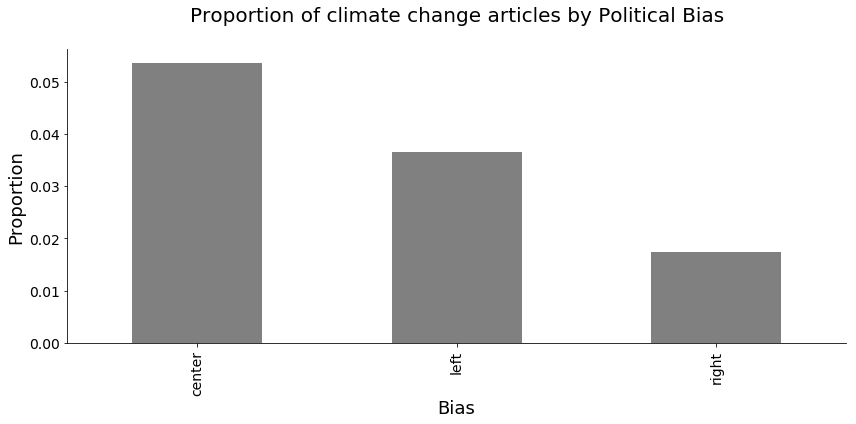

In [12]:
# The assignment of publications to bias slant is somewhat subjective
#liberal, conservative, and center
bias_assigns = {'Atlantic': 'left', 'Breitbart': 'right', 'Business Insider': 'left', 'Buzzfeed News': 'left', 'CNN': 'left', 'Fox News': 'right',
                'Guardian': 'left', 'National Review': 'right', 'New York Post': 'right', 'New York Times': 'left',
                'NPR': 'left', 'Reuters': 'center', 'Talking Points Memo': 'left', 'Washington Post': 'left', 'Vox': 'left'}
articles['bias'] = articles['publication'].apply(lambda x: bias_assigns[x])

bias_groups = articles.groupby('bias')
bias_proportions = bias_groups['cc_wds'].sum() / bias_groups['cc_wds'].count()

ax=bias_proportions.plot(kind='bar', fontsize=14, figsize=(12,6), color="gray")
ax.set_title('Proportion of climate change articles by Political Bias\n', fontsize=20)
ax.set_xlabel('Bias', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18)
plt.tight_layout()
sns.despine();

In [13]:
def standard_err(p1, n1, p2, n2):
    return np.sqrt((p1* (1-p1) / n1) + (p2 * (1-p2) / n2))

def ci_range(diff, std_err, cv=1.96):
    return (diff - cv * std_err, diff + cv * std_err)

def calc_ci_range(p1, n1, p2, n2):
    std_err = standard_err(p1, n1, p2, n2)
    diff = p1-p2
    return ci_range(diff, std_err)

center = bias_groups.get_group('center')
left = bias_groups.get_group('left')
right = bias_groups.get_group('right')

# Confidence interval is 
_ = np.round(calc_ci_range(bias_proportions['left'], len(left), bias_proportions['right'], len(right)), 3)*100
print(f"left vs. right: \t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(bias_proportions['center'], len(center), bias_proportions['left'], len(left)), 3)*100
print(f"center vs. left: \t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(bias_proportions['center'], len(center), bias_proportions['right'], len(right)), 3)*100
print(f"center vs. right: \t {_[0]}% to {_[1]}%")

left vs. right: 	 1.7000000000000002% to 2.1%
center vs. left: 	 1.3% to 2.1%
center vs. right: 	 3.2% to 4.1000000000000005%


Next, we can look at publication ownership, using the same approach. We divide our population into four groups, LLC, corporation, non-profit, and private.

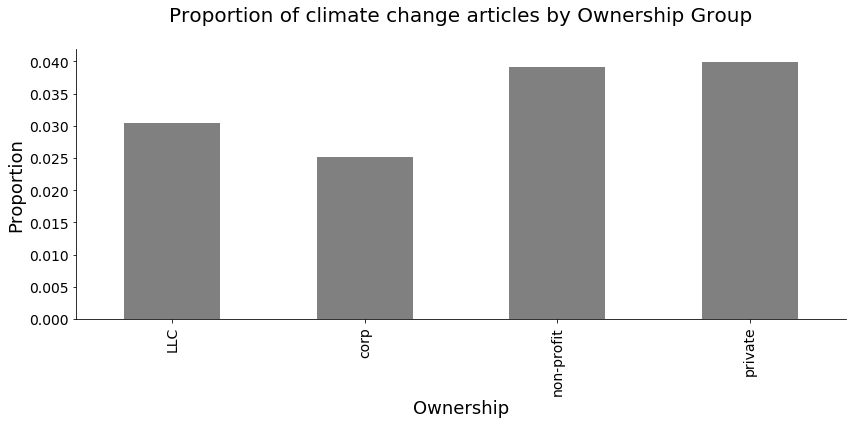

In [14]:
own_assigns = {'Atlantic': 'non-profit', 'Breitbart': 'LLC', 'Business Insider': 'corp', 'Buzzfeed News': 'private',
               'CNN': 'corp', 'Fox News': 'corp',
                'Guardian': 'LLC', 'National Review': 'non-profit', 'New York Post': 'corp', 'New York Times': 'corp',
                'NPR': 'non-profit', 'Reuters': 'corp', 'Talking Points Memo': 'private', 'Washington Post': 'LLC', 'Vox': 'private'}
articles['ownership'] = articles['publication'].apply(lambda x: own_assigns[x])
owner_groups = articles.groupby('ownership')
owner_proportions = owner_groups['cc_wds'].sum() / owner_groups['cc_wds'].count()

ax=owner_proportions.plot(kind='bar', fontsize=14, figsize=(12,6), color="gray")
ax.set_title('Proportion of climate change articles by Ownership Group\n', fontsize=20)
ax.set_xlabel('Ownership', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18)
plt.tight_layout()
sns.despine();

In [15]:
llc = owner_groups.get_group('LLC')
corp = owner_groups.get_group('corp')
non_profit = owner_groups.get_group('non-profit')
private = owner_groups.get_group('private')


_ = np.round(calc_ci_range(owner_proportions['LLC'], len(llc), owner_proportions['corp'], len(corp)), 3)*100
print(f"LLC vs. corp: \t\t\t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(owner_proportions['non-profit'], len(non_profit), owner_proportions['LLC'], len(llc)), 3)*100
print(f"non-profit vs. LLC \t\t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(owner_proportions['private'], len(private), owner_proportions['non-profit'], len(non_profit)), 3)*100
print(f"private vs. non-profit: \t {_[0]}% to {_[1]}%, (not significant)")

LLC vs. corp: 			 0.3% to 0.7000000000000001%
non-profit vs. LLC 		 0.6% to 1.2%
private vs. non-profit: 	 -0.3% to 0.5%, (not significant)
